### 线性回归的正则化
- The L1 regularization (also called Lasso)
- The L2 regularization (also called Ridge)
- The L1/L2 regularization (also called Elastic net)
- https://stats.stackexchange.com/questions/92672/difference-between-primal-dual-and-kernel-ridge-regression

In [726]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut

#### 生成原始数据

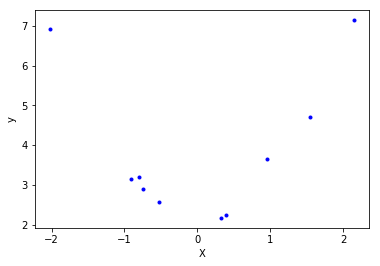

In [718]:
m = 10
X = 6 * np.random.rand(m, 1) - 3 # x的取值范围
X_square = np.square(X)
y = X_square + np.random.rand(m, 1) + 2  #y = x^2 + 2 
plt.plot(X, y, "b.")
plt.xlabel('X')
plt.ylabel('y')


In [710]:
data = np.array([[ -2.95507616,  10.94533252],
       [ -0.44226119,   2.96705822],
       [ -2.13294087,   6.57336839],
       [  1.84990823,   5.44244467],
       [  0.35139795,   2.83533936],
       [ -1.77443098,   5.6800407 ],
       [ -1.8657203 ,   6.34470814],
       [  1.61526823,   4.77833358],
       [ -2.38043687,   8.51887713],
       [ -1.40513866,   4.18262786]])

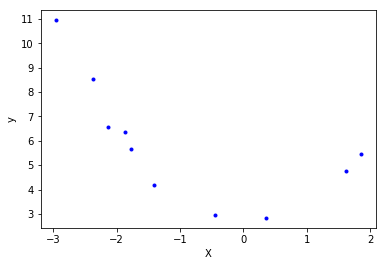

In [739]:
m = data.shape[0]
X = data[:, 0].reshape(-1, 1)  # 将array转换成矩阵
y = data[:, 1].reshape(-1, 1)
plt.plot(X, y, "b.")
plt.xlabel('X')
plt.ylabel('y')
plt.savefig('regularization-1.png', dpi=200)

### 1. 多项式回归

#### 添加特征的平方或其他高次方作为训练集中的新特征(现在的模型中只有一个特征)

#### 1.1 拟合直线方程

In [736]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[ 4.97857827] [[-0.92810463]]


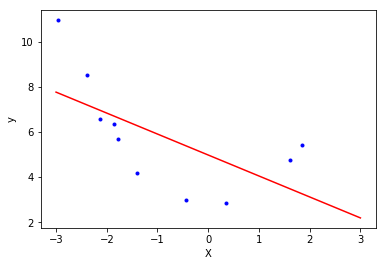

In [737]:
X_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)
y_plot = np.dot(X_plot, lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(X_plot, y_plot, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
# plt.axis([0, 2, 4, 12])
plt.savefig('regu-2.png', dpi=200)

In [738]:
h = np.dot(X, lin_reg.coef_.T) + lin_reg.intercept_
loss = 1/m * np.sum(np.square(h - y))
print(loss)

3.33630763328


In [734]:
X

array([-2.95507616, -0.44226119, -2.13294087,  1.84990823,  0.35139795,
       -1.77443098, -1.8657203 ,  1.61526823, -2.38043687, -1.40513866])

In [727]:
mean_squared_error(h, y)

3.3363076332788486

#### 拟合线性方程，得到方程的参数

In [775]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X_poly)

[[-2.95507616  8.73247511]
 [-0.44226119  0.19559496]
 [-2.13294087  4.54943675]
 [ 1.84990823  3.42216046]
 [ 0.35139795  0.12348052]
 [-1.77443098  3.1486053 ]
 [-1.8657203   3.48091224]
 [ 1.61526823  2.60909145]
 [-2.38043687  5.66647969]
 [-1.40513866  1.97441465]]


In [776]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[ 2.60996757] [[-0.12759678  0.9144504 ]]


In [777]:
lin_reg.coef_.T  # 参数的次序与X中特征的次序对应

array([[-0.12759678],
       [ 0.9144504 ]])

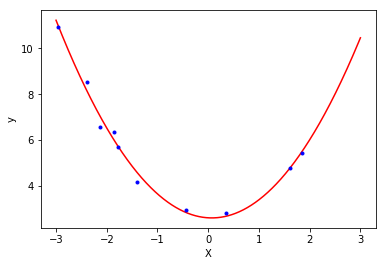

In [781]:
X_plot = np.linspace(-3, 3, 1000).reshape(-1, 1)
X_plot_poly = poly_features.fit_transform(X_plot)
y_plot = np.dot(X_plot_poly, lin_reg.coef_.T) + lin_reg.intercept_
plt.plot(X_plot, y_plot, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.savefig('regu-3.png', dpi=200)
# plt.show()

In [779]:
h = np.dot(X_poly, lin_reg.coef_.T) + lin_reg.intercept_
loss = mean_squared_error(h, y)
loss

0.071285627890853312

### 2. 过拟合的情况

- 增加自由度，可以增加模型对训练集的拟合度，减小训练误差。但是也会使得模型过于复杂，而降低了泛化能力(没有找到主要特征，过多的考虑了训练集中的特殊样本)

In [793]:
# test different degree and return loss
def try_degree(degree, X, y):
    poly_features_d = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_d = poly_features_d.fit_transform(X)
    lin_reg_d = LinearRegression()
    lin_reg_d.fit(X_poly_d, y)
    return {'X_poly': X_poly_d, 'intercept': lin_reg_d.intercept_, 'coef': lin_reg_d.coef_}

In [796]:
degree2loss_paras = []
for i in range(2, 20):
    paras = try_degree(i, X, y)
    h = np.dot(paras['X_poly'], paras['coef'].T) + paras['intercept']
    _loss = mean_squared_error(h, y)
    degree2loss_paras.append({'d': i, 'loss': _loss, 'coef': paras['coef'], 'intercept': paras['intercept']})
degree2loss_paras

[{'coef': array([[-0.12759678,  0.9144504 ]]),
  'd': 2,
  'intercept': array([ 2.60996757]),
  'loss': 0.071285627890853312},
 {'coef': array([[-0.04617889,  0.87150599, -0.024364  ]]),
  'd': 3,
  'intercept': array([ 2.69998678]),
  'loss': 0.06740483518108531},
 {'coef': array([[ 0.16202617,  0.95155089, -0.09202611, -0.02453635]]),
  'd': 4,
  'intercept': array([ 2.68377591]),
  'loss': 0.063691676188497998},
 {'coef': array([[ 0.17611322,  0.66897657, -0.17015995,  0.05332395,  0.02479577]]),
  'd': 5,
  'intercept': array([ 2.77647113]),
  'loss': 0.056610761171091525},
 {'coef': array([[-0.02889934,  0.61410552,  0.00647098,  0.10165042, -0.00924119,
          -0.01043156]]),
  'd': 6,
  'intercept': array([ 2.78455089]),
  'loss': 0.054742684505909064},
 {'coef': array([[-0.06281954,  0.43769404, -0.0029409 ,  0.20892074,  0.0115497 ,
          -0.02725681, -0.00451347]]),
  'd': 7,
  'intercept': array([ 2.81132697]),
  'loss': 0.054604054190623752},
 {'coef': array([[  0.46

In [797]:
min_index = np.argmin(np.array([i['loss'] for i in degree2loss_paras]))

In [801]:
min_loss_para = degree2loss_paras[min_index]
min_loss_para

{'coef': array([[  0.7900162 ,  26.72083627,   4.33062978,  -7.65908434,
          24.62696711,  12.33754429, -15.72302536,  -9.54076366,
           1.42221981,   1.74521649,   0.27877112]]),
 'd': 11,
 'intercept': array([-0.95562816]),
 'loss': 3.1080267005676934e-23}

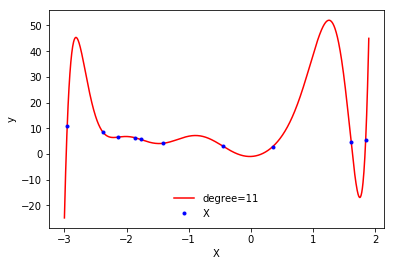

In [810]:
X_plot = np.linspace(-3, 1.9, 1000).reshape(-1, 1)
poly_features_d = PolynomialFeatures(degree=min_loss_para['d'], include_bias=False)
X_plot_poly = poly_features_d.fit_transform(X_plot)
y_plot = np.dot(X_plot_poly, min_loss_para['coef'].T) + min_loss_para['intercept']
fig, ax = plt.subplots(1, 1)
ax.plot(X_plot, y_plot, 'r-', label='degree=11')
ax.plot(X, y, 'b.', label='X')
plt.xlabel('X')
plt.ylabel('y')
ax.legend(loc='best', frameon=False)
plt.savefig('regu-4-overfitting.png', dpi=200)